# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [3]:
SERVS_cat=Table.read('../data/ELAIS_N1/SPIRE/dmu_XID+SPIRE_ELAIS-N1_SERVS_cat_20170717.fits')
SWIRE_cat=Table.read('../data/ELAIS_N1/SPIRE/dmu26_XID+SPIRE_ELAIS-N1_SWIRE_cat_20170808.fits')


In [4]:
SWIRE_cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J160000.316+542000.690,240.001318675,54.3335249815,58.4355,61.7955,54.7319,26.7743,30.3891,23.4051,5.42671,9.1242,2.2548,0.954074,-0.650163,-0.108604,4.42468,4.78009,4.34364,0.999156,0.999115,1.00032,2000.0,1728.0,2000.0,0.001,0.072,0.012
HELP_J161145.788+525236.929,242.94078253,52.8769246635,12.1732,15.5396,8.99539,8.59555,11.8403,5.32495,9.64839,13.6552,5.4965,-1.39551,-2.93559,-3.63896,4.78225,5.17161,3.70072,0.998268,0.999085,1.0008,2000.0,2000.0,2000.0,0.185,0.182,0.003
HELP_J161138.168+525244.570,242.909032282,52.8790472905,8.06194,11.3934,4.67516,3.31353,6.55401,1.09623,3.56608,6.91522,1.25193,-1.39551,-2.93559,-3.63896,4.78225,5.17161,3.70072,0.998996,1.00007,0.999106,2000.0,2000.0,2000.0,0.064,0.003,0.004
HELP_J161143.750+525251.314,242.93229323,52.8809206325,6.03384,9.13962,2.89977,4.78719,8.19178,2.09087,4.19183,7.84781,1.46235,-1.39551,-2.93559,-3.63896,4.78225,5.17161,3.70072,0.99961,0.998227,1.00229,2000.0,2000.0,2000.0,0.477,0.288,0.023
HELP_J161131.547+525241.333,242.881447116,52.8781479465,5.15366,8.65969,2.19222,8.19053,11.9124,4.70258,3.33188,6.42794,1.03795,-2.70248,-4.24655,-4.58284,5.52148,6.14984,4.86922,1.00098,1.00207,0.999868,2000.0,2000.0,2000.0,0.076,0.156,0.001
HELP_J161128.756+525312.827,242.869815896,52.8868964635,6.43384,9.9728,2.98768,2.70589,5.37603,0.925391,3.30195,6.55924,1.05021,-2.70248,-4.24655,-4.58284,5.52148,6.14984,4.86922,0.999285,0.999676,0.999511,2000.0,2000.0,2000.0,0.05,0.366,0.026
HELP_J161132.773+525325.277,242.886553205,52.8903547935,17.101,20.7197,13.5496,10.5475,14.3639,6.81834,14.902,18.8532,11.0523,-2.70248,-4.24655,-4.58284,5.52148,6.14984,4.86922,0.999959,1.00174,1.00173,2000.0,2000.0,2000.0,0.133,0.578,0.035
HELP_J161138.691+525423.576,242.911211156,52.9065487865,5.14198,8.33705,2.36726,2.11336,4.48071,0.613224,1.47881,3.7195,0.396107,-2.70248,-4.24655,-4.58284,5.52148,6.14984,4.86922,1.00007,1.00027,0.998992,2000.0,2000.0,2000.0,0.507,0.716,0.003


## Look at Symmetry of PDFs to determine depth level of catalogue

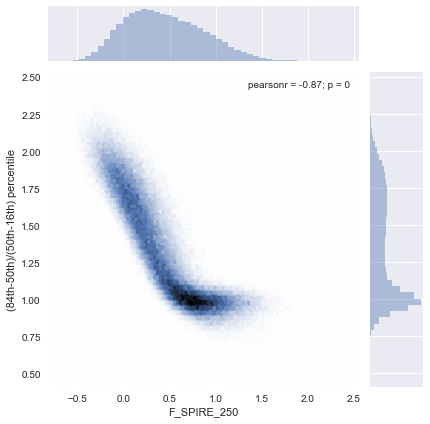

In [5]:
skew=(SERVS_cat['FErr_SPIRE_250_u']-SERVS_cat['F_SPIRE_250'])/(SERVS_cat['F_SPIRE_250']-SERVS_cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SERVS_cat['F_SPIRE_250']),y=skew, kind='hex')

For 250 $\mathrm{\mu m}$ depth is ~ 4mJy

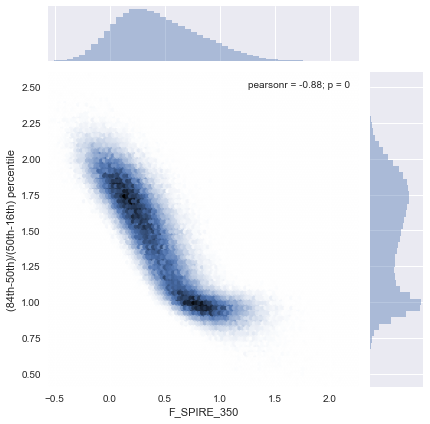

In [6]:
skew=(SERVS_cat['FErr_SPIRE_350_u']-SERVS_cat['F_SPIRE_350'])/(SERVS_cat['F_SPIRE_350']-SERVS_cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SERVS_cat['F_SPIRE_350']),y=skew, kind='hex')

For 350 $\mathrm{\mu m}$ depth is ~ 4mJy

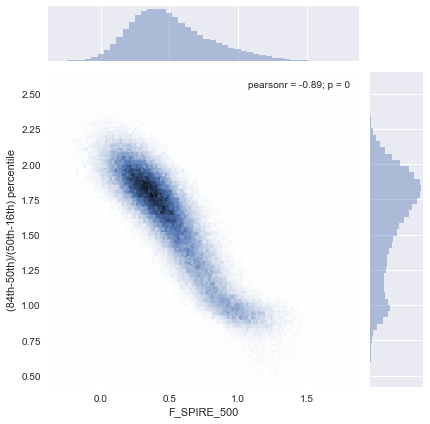

In [12]:
skew=(SERVS_cat['FErr_SPIRE_500_u']-SERVS_cat['F_SPIRE_500'])/(SERVS_cat['F_SPIRE_500']-SERVS_cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SERVS_cat['F_SPIRE_500']),y=skew, kind='hex')

For 500 $\mathrm{\mu m}$ depth is ~ 6mJy

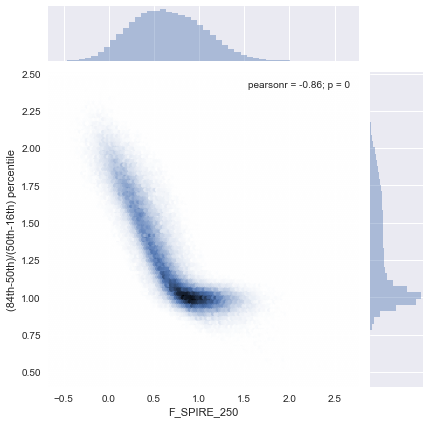

In [5]:
skew=(SWIRE_cat['FErr_SPIRE_250_u']-SWIRE_cat['F_SPIRE_250'])/(SWIRE_cat['F_SPIRE_250']-SWIRE_cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_250']),y=skew, kind='hex')

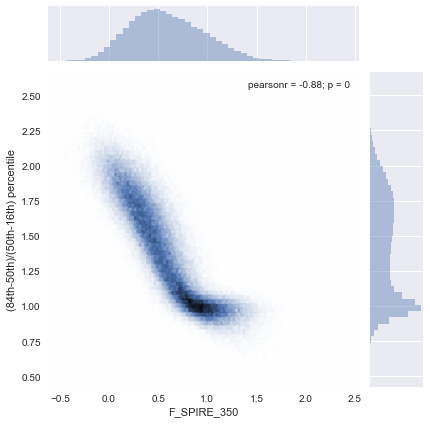

In [6]:
skew=(SWIRE_cat['FErr_SPIRE_350_u']-SWIRE_cat['F_SPIRE_350'])/(SWIRE_cat['F_SPIRE_350']-SWIRE_cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_350']),y=skew, kind='hex')

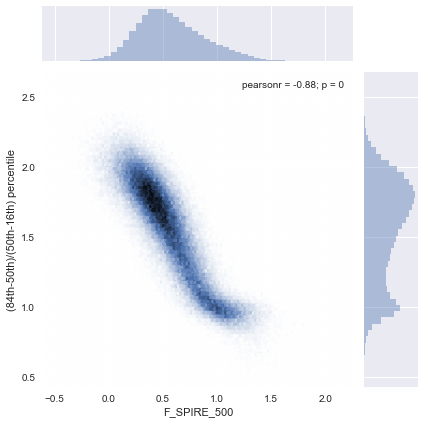

In [7]:
skew=(SWIRE_cat['FErr_SPIRE_500_u']-SWIRE_cat['F_SPIRE_500'])/(SWIRE_cat['F_SPIRE_500']-SWIRE_cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_500']),y=skew, kind='hex')

## Add flag to catalogue

In [13]:
from astropy.table import Column
SERVS_cat.add_column(Column(np.zeros(len(SERVS_cat), dtype=bool),name='flag_spire_250'))
SERVS_cat.add_column(Column(np.zeros(len(SERVS_cat), dtype=bool),name='flag_spire_350'))
SERVS_cat.add_column(Column(np.zeros(len(SERVS_cat), dtype=bool),name='flag_spire_500'))



In [8]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_250'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_350'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_500'))

In [14]:
ind_SERVS_250=(SERVS_cat['Pval_res_250']>0.5) | (SERVS_cat['F_SPIRE_250'] < 4)
ind_SERVS_350=(SERVS_cat['Pval_res_350']>0.5) | (SERVS_cat['F_SPIRE_350'] < 4)
ind_SERVS_500=(SERVS_cat['Pval_res_500']>0.5) | (SERVS_cat['F_SPIRE_500'] < 4)


In [9]:
ind_SWIRE_250=(SWIRE_cat['Pval_res_250']>0.5) | (SWIRE_cat['F_SPIRE_250'] < 4)
ind_SWIRE_350=(SWIRE_cat['Pval_res_350']>0.5) | (SWIRE_cat['F_SPIRE_350'] < 4)
ind_SWIRE_500=(SWIRE_cat['Pval_res_500']>0.5) | (SWIRE_cat['F_SPIRE_500'] < 4)


In [18]:
print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(SERVS_cat))

79871 83965 81900 120282


In [10]:
print(ind_SWIRE_250.sum(),ind_SWIRE_350.sum(),ind_SWIRE_500.sum(),len(SWIRE_cat))

73621 83956 87286 149329


In [15]:
SERVS_cat['flag_spire_250'][ind_SERVS_250]=True
SERVS_cat['flag_spire_350'][ind_SERVS_350]=True
SERVS_cat['flag_spire_500'][ind_SERVS_500]=True


In [11]:
SWIRE_cat['flag_spire_250'][ind_SWIRE_250]=True
SWIRE_cat['flag_spire_350'][ind_SWIRE_350]=True
SWIRE_cat['flag_spire_500'][ind_SWIRE_500]=True

In [16]:
SERVS_cat.write('../data/ELAIS_N1/SPIRE/dmu26_XID+SPIRE_ELAIS-N1_SERVS_cat_20170725.fits', format='fits',overwrite=True)


In [12]:
SWIRE_cat.write('../data/ELAIS_N1/SPIRE/dmu26_XID+SPIRE_ELAIS-N1_SWIRE_cat_20170808.fits', format='fits',overwrite=True)


In [22]:
ind_good=SERVS_cat['flag_spire_250'] | SERVS_cat['flag_spire_350'] | SERVS_cat['flag_spire_500']

In [26]:
np.invert(ind_good).sum()

17666

In [29]:
SERVS_cat[np.invert(ind_good)][0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,
str100,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
HELP_J161001.294+533558.395,242.505392806,53.5995542015,8.46542,10.3493,6.63564,6.68709,8.84846,4.47119,4.57256,8.28933,1.63805,-4.50992,-7.95498,-16.0176,1.96479,1.92953,2.03879,0.998767,1.0024,0.999121,2000.0,1768.0,1209.0,0.0,0.001,0.008,False,False,False
HELP_J161002.899+533555.635,242.512080317,53.5987874035,4.60298,6.40347,2.90031,8.97763,11.014,6.86234,10.6039,13.6323,7.357,-4.50992,-7.95498,-16.0176,1.96479,1.92953,2.03879,0.99899,1.00219,1.00041,2000.0,2000.0,2000.0,0.001,0.001,0.014,False,False,False
HELP_J161005.671+533637.422,242.523627956,53.6103948943,4.04254,8.3425,1.17425,7.48504,14.087,2.2416,4.58436,10.021,1.23226,-4.50992,-7.95498,-16.0176,1.96479,1.92953,2.03879,1.00135,1.00043,1.00077,1448.0,2000.0,1406.0,0.001,0.0,0.003,False,False,False
HELP_J161006.552+533535.714,242.527297929,53.5932539466,12.2044,13.7976,10.7207,14.5513,16.2299,12.7221,9.4334,12.5889,6.35387,-4.50992,-7.95498,-16.0176,1.96479,1.92953,2.03879,0.998388,0.999021,0.998229,2000.0,1321.0,2000.0,0.0,0.003,0.091,False,False,False
HELP_J161006.211+533637.170,242.52587794,53.6103249885,10.0993,13.0404,6.88131,6.75253,11.4696,2.52761,7.22366,12.4976,2.46265,-4.50992,-7.95498,-16.0176,1.96479,1.92953,2.03879,1.00238,1.00061,1.00266,1562.0,2000.0,1691.0,0.003,0.0,0.003,False,False,False
HELP_J161029.273+533744.069,242.62196951,53.6289080555,14.9155,16.821,13.057,19.8497,22.527,17.3251,19.7864,24.7141,14.5632,-4.50992,-7.95498,-16.0176,1.96479,1.92953,2.03879,0.998526,1.00374,1.00216,2000.0,1130.0,745.0,0.001,0.0,0.0,False,False,False
HELP_J161030.215+533653.034,242.625894507,53.6147317423,79.827,81.5652,77.8263,41.4968,44.2614,38.3691,22.7542,26.4677,19.0159,-4.50992,-7.95498,-16.0176,1.96479,1.92953,2.03879,0.999187,0.999354,1.00037,2000.0,2000.0,2000.0,0.448,0.09,0.022,False,False,False
HELP_J161023.677+533617.740,242.598654957,53.6049277335,7.59093,10.5067,3.66349,6.65432,10.927,2.35472,5.39123,10.8907,1.57956,-4.50992,-7.95498,-16.0176,1.96479,1.92953,2.03879,1.00069,0.998905,0.999495,1736.0,2000.0,2000.0,0.013,0.099,0.116,False,False,False
